In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('laptop_price_dataset.csv', encoding='latin1')

In [3]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,211938.958
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,142212.308
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,90965.000
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,401424.590
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,285329.520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
df.duplicated().sum()

0

#### Laptop ID

In [6]:
df.drop('laptop_ID',axis=1,inplace=True)

In [7]:
df.shape

(1303, 12)

#### Product

In [8]:
df['Product'].nunique()

618

In [9]:
df.drop('Product',axis=1,inplace=True)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Company

In [11]:
df['Company'].nunique()

19

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


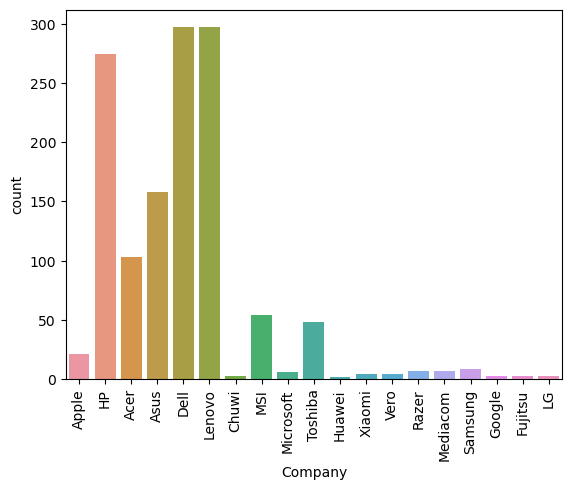

In [12]:
sns.countplot(df['Company'])
plt.xticks(rotation='vertical')
plt.show()

In [13]:
df['Company'].value_counts().sort_values(ascending=False)

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


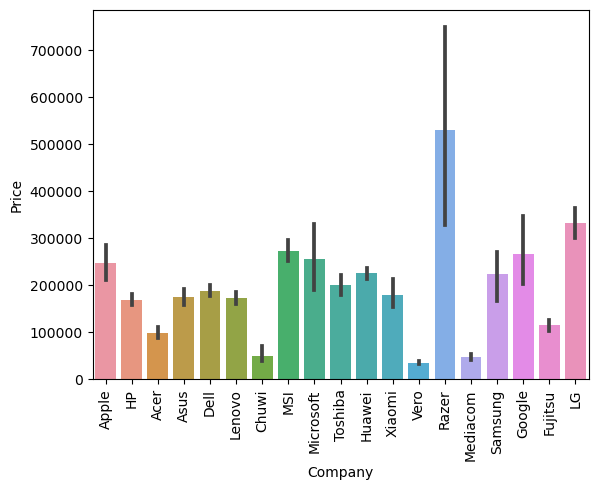

In [14]:
sns.barplot(df['Company'],df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [15]:
counts = df['Company'].value_counts()
filtered_df = df[counts[df['Company']].values < 20]['Company'].unique()

In [16]:
filtered_df

array(['Chuwi', 'Microsoft', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

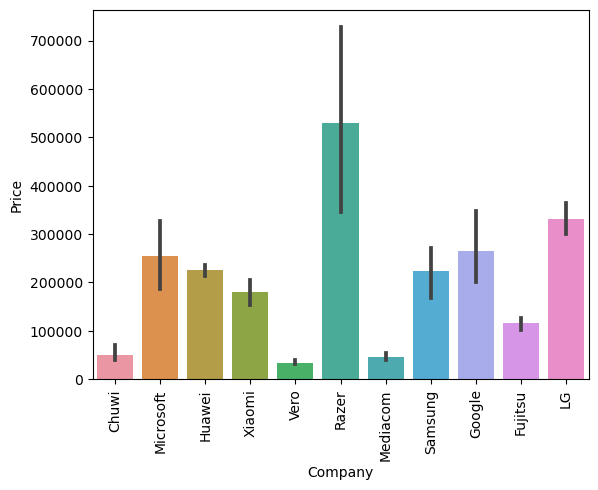

In [17]:
counts = df['Company'].value_counts()
filtered_companies = counts[counts < 20].index
filtered_df = df[df['Company'].isin(filtered_companies)]
sns.barplot(data=filtered_df, x='Company', y='Price')
plt.xticks(rotation='vertical')
plt.show()

In [18]:
df.loc[df['Company'].isin(['Chuwi', 'Vero', 'Mediacom', 'Fujitsu']), 'Company'] = 'Others'

In [19]:
df.loc[df['Company'].isin(['Microsoft','Huawei','Xiaomi','Samsung','Google','LG']), 'Company'] = 'Avg_company'

In [20]:
df.Company.nunique()

11

#### TypeName

In [21]:
df['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


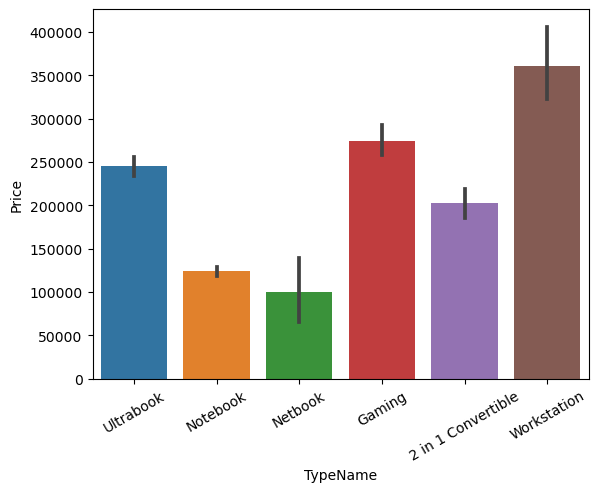

In [22]:
sns.barplot(df['TypeName'],df['Price'])
plt.xticks(rotation=30)
plt.show()

#### Inches

In [23]:
df['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inches', ylabel='Price'>

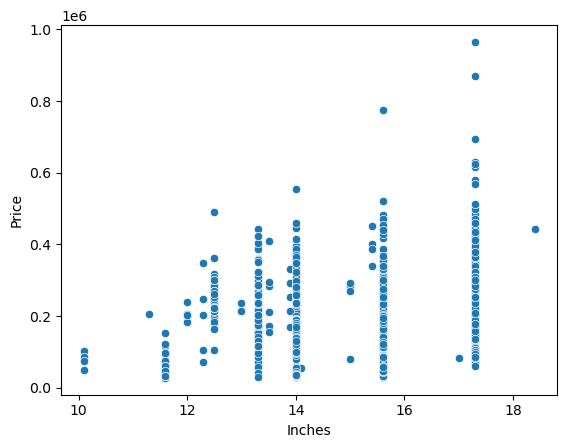

In [24]:
sns.scatterplot(df['Inches'],df['Price'])

In [25]:
df['Inches'] = df['Inches'].astype('int32')

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(10.0, 20.0)

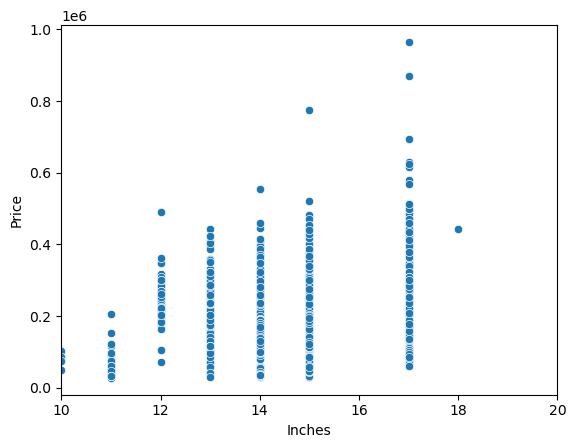

In [26]:
sns.scatterplot(df['Inches'],df['Price'])
plt.xlim(10,20)

#### ScreenResolution

In [27]:
df['y_resolution'] = df['ScreenResolution'].str.split('x').apply(lambda x: x[1])

In [28]:
df.y_resolution = df.y_resolution.astype('int32')

In [29]:
condition = [df['y_resolution'] <= 900, ((df['y_resolution'] > 900) & (df['y_resolution'] < 1800)), df['y_resolution'] >= 1800]
choice = [1,2,3]
df['Display'] = np.select(condition,choice)

In [30]:
df['Display'].value_counts()

2    893
1    335
3     75
Name: Display, dtype: int64

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


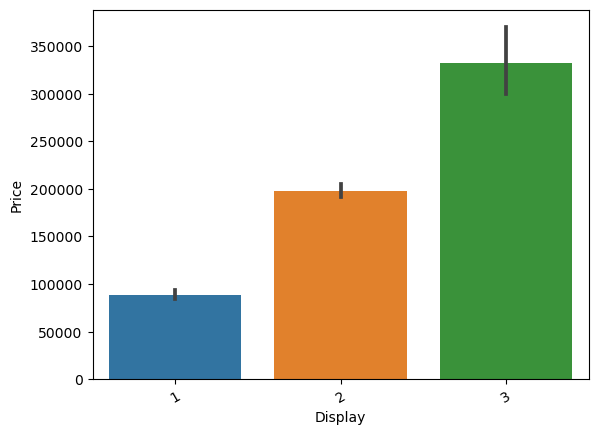

In [31]:
sns.barplot(df['Display'],df['Price'])
plt.xticks(rotation=30)
plt.show()

In [32]:
df['IPS'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [33]:
df.drop('ScreenResolution',axis=1,inplace=True)
df.drop('y_resolution',axis=1,inplace=True)

In [34]:
df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Display,IPS,Touchscreen
1151,HP,Notebook,15,AMD E-Series 7110 1.8GHz,4GB,500GB HDD,AMD Radeon R2 Graphics,Windows 10,1.86kg,46985.400,1,0,0
712,Dell,Notebook,15,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Linux,1.98kg,114853.200,2,0,0
452,HP,Workstation,15,Intel Core i7 7820HQ 2.9GHz,8GB,512GB SSD,Intel HD Graphics 620,Windows 10,2.31kg,242678.800,2,1,0
876,Asus,Notebook,15,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Linux,2kg,63120.218,1,0,0
336,Dell,Ultrabook,15,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce 940MX,Windows 10,1.9kg,165951.800,2,1,0


#### Cpu

In [35]:
df['Frequency'] = df['Cpu'].str.split(' ').str[-1]
df['Frequency'] = df['Frequency'].str.replace('GHz','')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   int32  
 3   Cpu          1303 non-null   object 
 4   Ram          1303 non-null   object 
 5   Memory       1303 non-null   object 
 6   Gpu          1303 non-null   object 
 7   OpSys        1303 non-null   object 
 8   Weight       1303 non-null   object 
 9   Price        1303 non-null   float64
 10  Display      1303 non-null   int32  
 11  IPS          1303 non-null   int64  
 12  Touchscreen  1303 non-null   int64  
 13  Frequency    1303 non-null   object 
dtypes: float64(1), int32(2), int64(2), object(9)
memory usage: 132.5+ KB


In [37]:
df['Frequency'] = df['Frequency'].astype('float64').round()

In [38]:
df.loc[df['Frequency'] == 4.0, 'Frequency'] = 2.0

In [39]:
df['Frequency'].value_counts()

2.0    761
3.0    451
1.0     91
Name: Frequency, dtype: int64

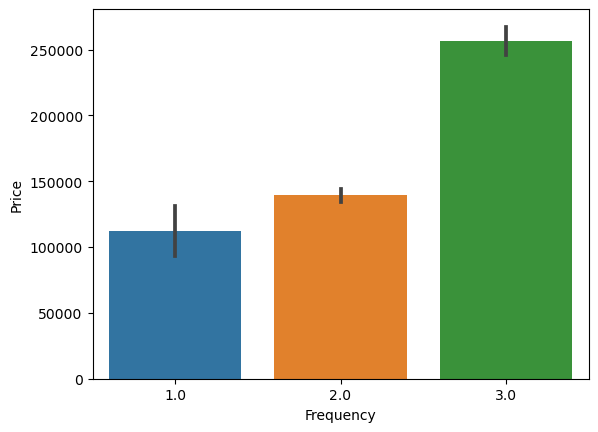

In [40]:
sns.barplot(data=df, x='Frequency', y='Price')
plt.show()

In [41]:
mask = df['Cpu'].str.startswith('Intel Core i7')

df.loc[mask, 'Processor'] = df.loc[mask, 'Cpu'].str.split().apply(lambda x: ' '.join(x[:-1]))
df.loc[~mask, 'Processor'] = df.loc[~mask, 'Cpu'].str.split(' ').apply(lambda x: " ".join(x[:2]))

In [42]:
mask1 = df['Processor'].str.startswith('Intel Core i7') & (df['Processor'].str[14:16] > '75')
mask2 = df['Processor'].str.startswith('Intel Core i7') & ~(df['Processor'].str[14:16] > '75')

df['Processor'] = np.where(mask1, 'Intel Core i7 7500+', np.where(mask2, 'Intel Core i7 7500', df['Processor']))

In [43]:
df['Processor'].value_counts()

Intel Core             578
Intel Core i7 7500     272
Intel Core i7 7500+    255
Intel Celeron           88
Intel Pentium           30
AMD A9-Series           17
Intel Atom              13
AMD A6-Series           11
AMD E-Series             9
AMD A12-Series           8
AMD A10-Series           6
AMD A8-Series            4
AMD Ryzen                4
Intel Xeon               4
AMD FX                   2
AMD A4-Series            1
Samsung Cortex           1
Name: Processor, dtype: int64

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


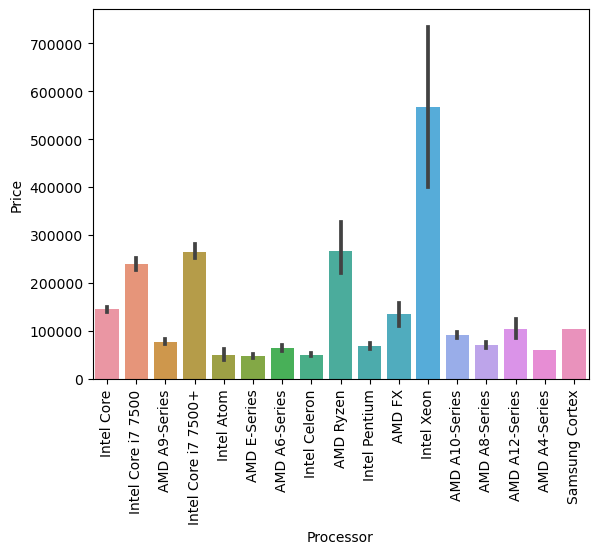

In [44]:
sns.barplot(df['Processor'],df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [45]:
df.drop('Cpu',axis=1,inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Inches       1303 non-null   int32  
 3   Ram          1303 non-null   object 
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   object 
 8   Price        1303 non-null   float64
 9   Display      1303 non-null   int32  
 10  IPS          1303 non-null   int64  
 11  Touchscreen  1303 non-null   int64  
 12  Frequency    1303 non-null   float64
 13  Processor    1303 non-null   object 
dtypes: float64(2), int32(2), int64(2), object(8)
memory usage: 132.5+ KB


#### Memory

In [47]:
df['Mem1'] = df['Memory'].str.split('+').apply(lambda x: x[0])
df['Mem2'] = df['Memory'].str.split('+').apply(lambda x: x[1] if len(x)>1 else 0)

In [48]:
df.sample(10)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Display,IPS,Touchscreen,Frequency,Processor,Mem1,Mem2
418,Dell,Notebook,15,8GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.14kg,85420.090,1,0,0,2.0,Intel Core,1TB HDD,0
0,Apple,Ultrabook,13,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,211938.958,2,1,0,2.0,Intel Core,128GB SSD,0
747,HP,Notebook,15,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,85269.800,2,0,0,2.0,Intel Core,256GB SSD,0
12,Apple,Ultrabook,15,16GB,256GB SSD,AMD Radeon Pro 555,macOS,1.83kg,386003.254,3,1,0,3.0,Intel Core i7 7500,256GB SSD,0
1113,HP,Ultrabook,13,8GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.16kg,311495.800,2,0,0,2.0,Intel Core i7 7500,512GB SSD,0
349,Dell,Ultrabook,15,8GB,1TB HDD,AMD Radeon 530,Windows 10,1.9kg,104886.600,2,0,0,2.0,Intel Core,1TB HDD,0
253,Lenovo,2 in 1 Convertible,13,8GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.37kg,292511.800,2,1,1,2.0,Intel Core i7 7500+,512GB SSD,0
346,HP,Notebook,14,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.44kg,44137.800,1,0,0,2.0,Intel Celeron,32GB Flash Storage,0
1096,Dell,Notebook,15,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,101058.160,2,0,0,2.0,Intel Core,1TB HDD,0
459,HP,Notebook,17,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,2.5kg,101232.180,1,0,0,2.0,Intel Core,256GB SSD,0


In [49]:
df['Mem2'].value_counts()

0                 1095
  1TB HDD          185
  2TB HDD           15
  256GB SSD          3
  500GB HDD          2
  1.0TB Hybrid       2
  512GB SSD          1
Name: Mem2, dtype: int64

In [50]:
df[['Value1','Type1']] = df['Mem1'].str.split(n=1, expand=True)

In [51]:
df[['Value2','Type2']] = df['Mem2'].str.split(n=1, expand=True).fillna(value=0)

In [52]:
def convert_to_gb(memory_size):
    if isinstance(memory_size, str):
        if 'TB' in memory_size:
            return float(memory_size.replace('TB', '')) * 1000
        elif 'GB' in memory_size:
            return float(memory_size.replace('GB', ''))
    return memory_size

In [53]:
df[['Value1', 'Value2']] = df[['Value1', 'Value2']].applymap(convert_to_gb)

In [54]:
df['Type1'] = df['Type1'].str.strip()

In [55]:
df['SSD'] = df.apply(lambda x: (x['Value1'] + x['Value2']) if (x['Type1'] == x['Type2'] == 'SSD') else (x['Value1'] if x['Type1'] == 'SSD' else (x['Value2'] if x['Type2'] == 'SSD' else 0)), axis=1)

In [56]:
df['Type2'] = df['Type2'].str.strip()

df['HDD'] = df.apply(lambda x: (x['Value1'] + x['Value2']) if (x['Type1'] == x['Type2'] == 'HDD') else (x['Value1'] if x['Type1'] == 'HDD' else (x['Value2'] if x['Type2'] == 'HDD' else 0)), axis=1)

In [57]:
df.drop(['Memory','Mem1','Mem2','Value1','Type1','Value2','Type2'], axis=1, inplace=True)

#### RAM

In [58]:
df['Ram'] = df['Ram'].str.replace('GB', '')

In [59]:
df['Ram'] = df['Ram'].astype('int32')

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


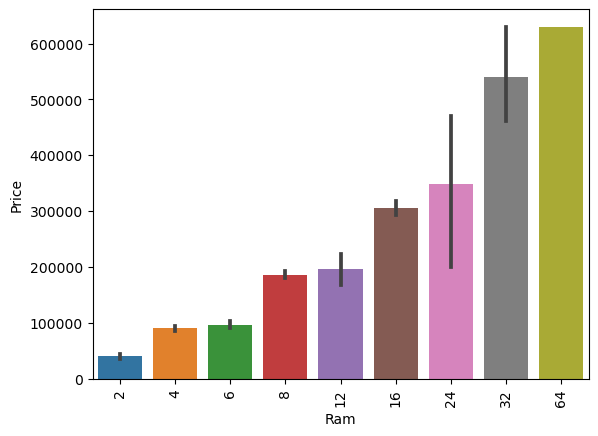

In [60]:
sns.barplot(df['Ram'],df['Price'])
plt.xticks(rotation='vertical')
plt.show()

#### GPU

In [61]:
df['Gpu'] = df['Gpu'].apply(lambda x: x.split()[0])

In [62]:
df.loc[df['Gpu'] == 'ARM', 'Gpu'] = 'AMD'

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


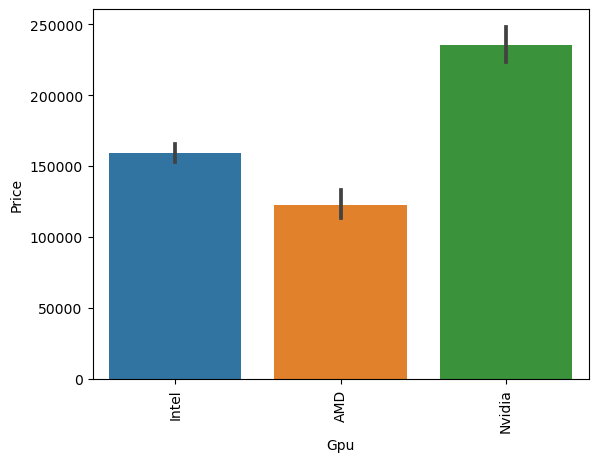

In [63]:
sns.barplot(df['Gpu'],df['Price'])
plt.xticks(rotation='vertical')
plt.show()

#### OpSys

In [64]:
def concat_os(os):
    if os == 'No OS' or os == 'Android':
        return 'Others'
    elif os == 'Windows 10 S':
        return 'Windows 10'
    elif os == 'Mac OS X':
        return 'macOS'
    else:
        return os

In [65]:
df['OpSys'] = df['OpSys'].apply(concat_os)

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


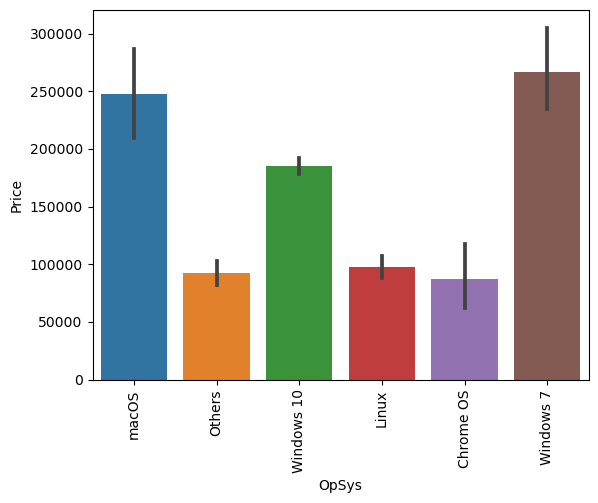

In [66]:
sns.barplot(df['OpSys'],df['Price'])
plt.xticks(rotation='vertical')
plt.show()

#### Weight

In [67]:
df['Weight'].value_counts()

2.2kg     121
2.1kg      58
2.4kg      44
2.3kg      41
2.5kg      38
         ... 
3.25kg      1
4.7kg       1
1.55kg      1
1.18kg      1
4.0kg       1
Name: Weight, Length: 179, dtype: int64

In [68]:
df['Weight'] = df['Weight'].str.replace('kg', '').astype('float64')

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

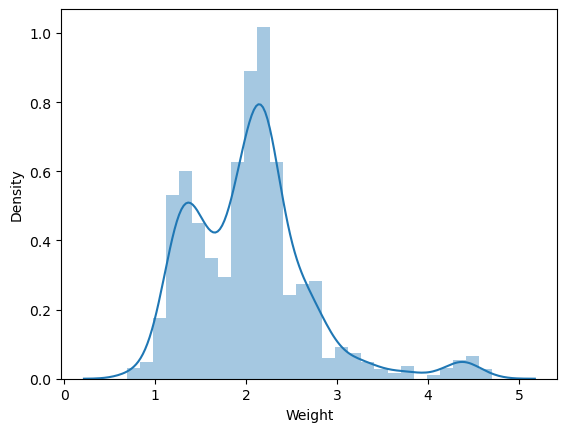

In [69]:
sns.distplot(df['Weight'])

In [70]:
# Define the list of nearest values
nearest_values = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]

# Apply the conversion to the weight column
df['Weight'] = df['Weight'].apply(lambda x: min(nearest_values, key=lambda v: abs(v - x)))

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


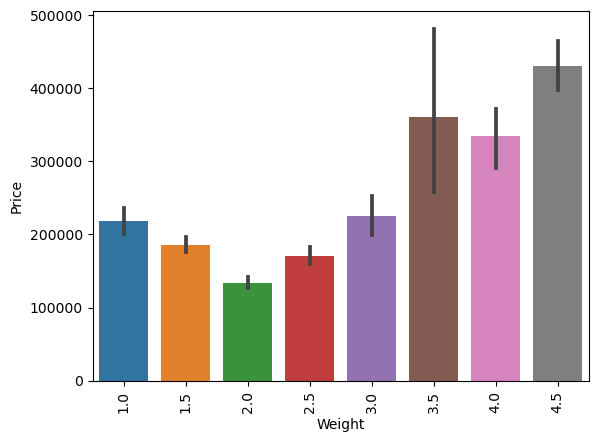

In [71]:
sns.barplot(df['Weight'],df['Price'])
plt.xticks(rotation='vertical')
plt.show()

#### Price

C:\Users\kshit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

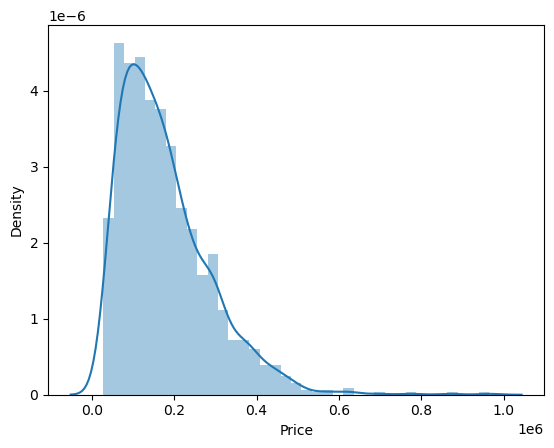

In [72]:
sns.distplot(df['Price'])

### Visualizing the Extracted Dataset

In [73]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,Display,IPS,Touchscreen,Frequency,Processor,SSD,HDD
0,Apple,Ultrabook,13,8,Intel,macOS,1.5,211938.958,2,1,0,2.0,Intel Core,128.0,0.0
1,Apple,Ultrabook,13,8,Intel,macOS,1.5,142212.308,1,0,0,2.0,Intel Core,0.0,0.0
2,HP,Notebook,15,8,Intel,Others,2.0,90965.000,2,0,0,2.0,Intel Core,256.0,0.0
3,Apple,Ultrabook,15,16,AMD,macOS,2.0,401424.590,3,1,0,3.0,Intel Core i7 7500,512.0,0.0
4,Apple,Ultrabook,13,8,Intel,macOS,1.5,285329.520,2,1,0,3.0,Intel Core,256.0,0.0


In [74]:
df.corr()['Price']

Inches         0.110035
Ram            0.743007
Weight         0.230891
Price          1.000000
Display        0.547937
IPS            0.252208
Touchscreen    0.191226
Frequency      0.492640
SSD            0.670799
HDD           -0.096441
Name: Price, dtype: float64

#### Checking for Outliers

<Figure size 1000x600 with 0 Axes>

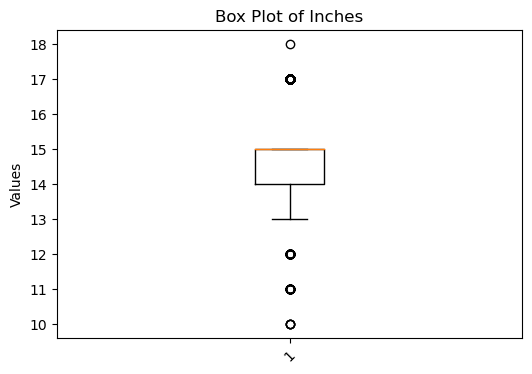

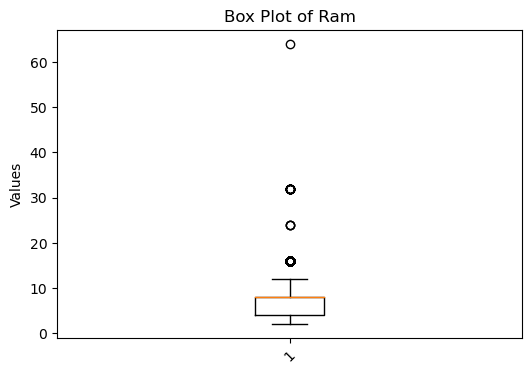

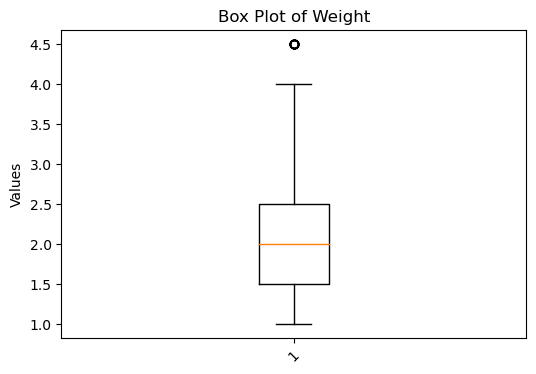

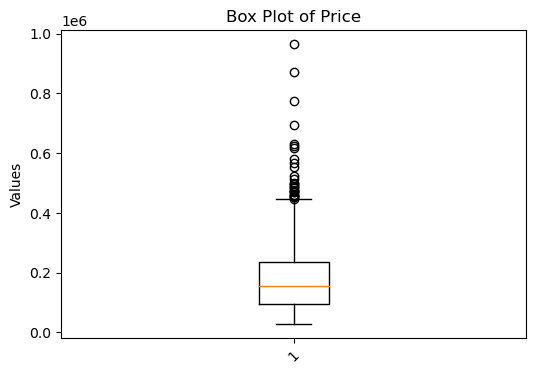

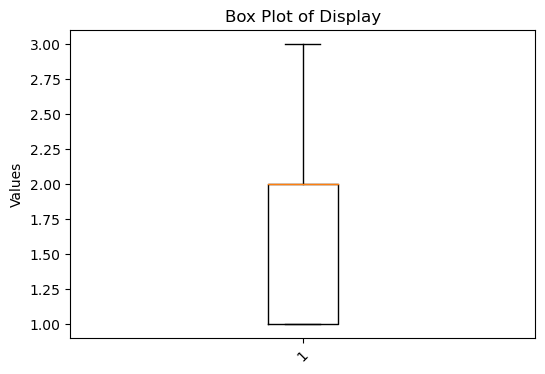

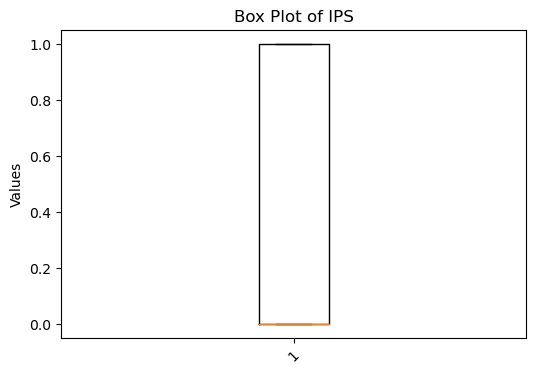

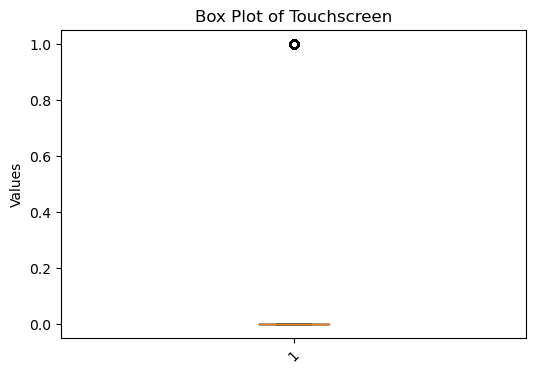

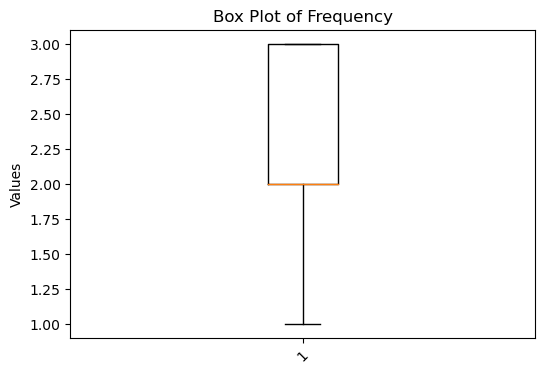

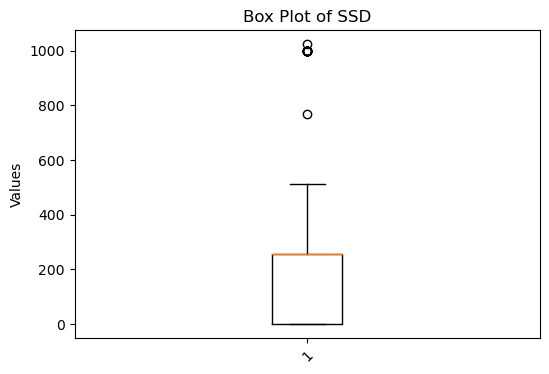

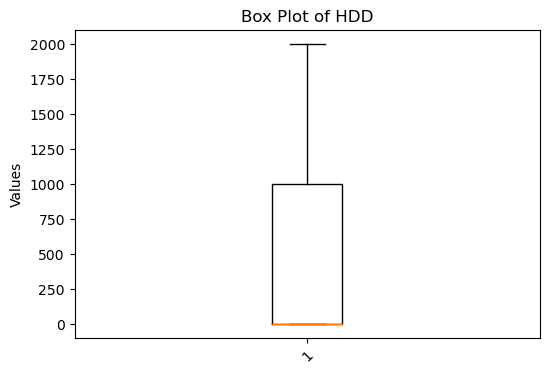

In [75]:
columns = ['Inches', 'Ram', 'Weight', 'Price', 'Display', 'IPS', 'Touchscreen', 'Frequency', 'SSD', 'HDD']

plt.figure(figsize=(10, 6))

for i, column in enumerate(columns):
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[column])
    plt.xticks(rotation=45)
    plt.ylabel('Values')
    plt.title(f'Box Plot of {column}')
    plt.show()

### Spliting the dataset

In [76]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [78]:
# for handing error during model prediction..

indices_to_drop = X_test[X_test['Processor'].isin(['AMD FX', 'Samsung Cortex'])].index
X_test.drop(indices_to_drop, inplace=True)
y_test.drop(indices_to_drop, inplace=True)

# Reset indices of X_test and y_test
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [79]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [80]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

In [81]:
X_train.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Display,IPS,Touchscreen,Frequency,Processor,SSD,HDD
290,Acer,Notebook,15,2,Intel,Chrome OS,2.0,1,0,0,2.0,Intel Celeron,16.0,0.0
757,HP,Workstation,15,8,Nvidia,Windows 7,2.5,2,0,0,3.0,Intel Core i7 7500,256.0,0.0
762,Avg_company,Ultrabook,12,8,Intel,Chrome OS,1.0,2,0,1,1.0,Intel Core,256.0,0.0
121,MSI,Gaming,15,16,Nvidia,Windows 10,2.0,2,0,0,3.0,Intel Core i7 7500+,256.0,2000.0
532,Asus,Notebook,15,8,Nvidia,Windows 10,2.0,3,1,0,3.0,Intel Core i7 7500,256.0,1000.0


In [82]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, [2,3,6,7,8,9,10,12,13]),
        ('cat', categorical_transformer, [0,1,4,5,11])
    ]
)

In [83]:
from sklearn.pipeline import Pipeline

In [84]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet

from sklearn.metrics import r2_score,mean_absolute_error

In [85]:
model = LinearRegression()

pipe = Pipeline([
            ('preprocessor',preprocessor),
            ('regressor', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8234632283015231
MAE 0.2023645204051284


In [130]:
model = Ridge()

pipe = Pipeline([
            ('preprocessor',preprocessor),
            ('regressor', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8246269587561041
MAE 0.2022122852188822


In [136]:
model = Lasso(alpha=0.001)

pipe = Pipeline([
            ('preprocessor',preprocessor),
            ('regressor', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8201546090644818
MAE 0.20403433889817088


In [88]:
model = ElasticNet()

pipe = Pipeline([
            ('preprocessor',preprocessor),
            ('regressor', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score -0.004783219668816008
MAE 0.5149054601208167


In [89]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [138]:
model = SVR()

pipe = Pipeline([
            ('preprocessor',preprocessor),
            ('regressor', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8631647639628037
MAE 0.1703371464887311


In [141]:
model = KNeighborsRegressor(n_neighbors=5)

pipe = Pipeline([
            ('preprocessor',preprocessor),
            ('regressor', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8089459554365421
MAE 0.20415209947539376


In [92]:
model = DecisionTreeRegressor()

pipe = Pipeline([
            ('preprocessor',preprocessor),
            ('regressor', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7641686544233259
MAE 0.22043010721907122


In [93]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor

In [94]:
model = RandomForestRegressor()

pipe = Pipeline([
            ('preprocessor',preprocessor),
            ('regressor', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.838617587276659
MAE 0.18150032980425532


In [95]:
model = GradientBoostingRegressor()

pipe = Pipeline([
            ('preprocessor',preprocessor),
            ('regressor', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8601974871152609
MAE 0.17418418628572305


In [96]:
model = AdaBoostRegressor()

pipe = Pipeline([
            ('preprocessor',preprocessor),
            ('regressor', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.779346548388106
MAE 0.23192392524967198


In [97]:
model = ExtraTreesRegressor()

pipe = Pipeline([
            ('preprocessor',preprocessor),
            ('regressor', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.81947164742697
MAE 0.18963001498096077


In [98]:
from xgboost import XGBRegressor

In [99]:
model = XGBRegressor()

pipe = Pipeline([
            ('preprocessor',preprocessor),
            ('regressor', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8643035674097166
MAE 0.1664990530588069


In [100]:
# Manual hyperparameter tuning

model = RandomForestRegressor(n_estimators=200, max_depth=5,min_samples_split=5)

pipe = Pipeline([
            ('preprocessor',preprocessor),
            ('regressor', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8015588774400055
MAE 0.21392350567368457


#### Randomized Search CV

In [101]:
from sklearn.model_selection import RandomizedSearchCV

In [102]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, [2, 3, 6, 7, 8, 9, 10, 12, 13]),
        ('cat', categorical_transformer, [0, 1, 4, 5, 11])
    ]
)

# Apply the ColumnTransformer to X_train and y_train
X_train_transformed = preprocessor.fit_transform(X_train)
y_train_transformed = y_train

In [103]:
X_test_transformed = preprocessor.transform(X_test)

In [104]:
import warnings
warnings.filterwarnings('ignore')

In [148]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num=10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(100, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 4, 5, 7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 8, 10, 15]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': ['sqrt', 'log2', 'auto'],
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson']}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['sqrt', 'log2', 'auto'], 'max_depth': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'min_samples_split': [1, 2, 4, 5, 7], 'min_samples_leaf': [1, 2, 5, 8, 10, 15], 'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson']}


In [ ]:
rfr = RandomForestRegressor()

rfr_randomcv = RandomizedSearchCV(estimator=rfr,param_distributions=random_grid,n_iter=100,cv=5, verbose = 2, n_jobs=-1, random_state=33)

rfr_randomcv.fit(X_train_transformed,y_train_transformed)

In [ ]:
rfr_randomcv.best_params_

In [145]:
best_random_grid=rfr_randomcv.best_estimator_

In [146]:
y_pred=best_random_grid.predict(X_test_transformed)

In [147]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.835683031303783
MAE 0.18258529101326948


#### GridSearch CV

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
rfr_randomcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 7,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'friedman_mse'}

In [113]:
param_grid = {
    'criterion' : [rfr_randomcv.best_params_['criterion']],
    'max_depth' : [rfr_randomcv.best_params_['max_depth']],
    'max_features' : [rfr_randomcv.best_params_['max_features']],
    'min_samples_leaf':[rfr_randomcv.best_params_['min_samples_leaf'],
                       rfr_randomcv.best_params_['min_samples_leaf'] + 2,
                       rfr_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split' : [rfr_randomcv.best_params_['min_samples_split'] - 5,
                          rfr_randomcv.best_params_['min_samples_split'] - 2,
                          rfr_randomcv.best_params_['min_samples_split'],
                          rfr_randomcv.best_params_['min_samples_split'] + 3],
    'n_estimators' : [rfr_randomcv.best_params_['n_estimators']-50,
                     rfr_randomcv.best_params_['n_estimators'],
                     rfr_randomcv.best_params_['n_estimators'] + 100,
                     rfr_randomcv.best_params_['n_estimators'] + 150]
}

print(param_grid)

{'criterion': ['friedman_mse'], 'max_depth': [120], 'max_features': ['sqrt'], 'min_samples_leaf': [1, 3, 5], 'min_samples_split': [2, 5, 7, 10], 'n_estimators': [50, 100, 200, 250]}


In [114]:
#fitting gridsearch to the data

rfr = RandomForestRegressor()

gridsearchcv = GridSearchCV(estimator=rfr, param_grid=param_grid,  cv=5, n_jobs=-1, verbose=2)

gridsearchcv.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse'], 'max_depth': [120],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [50, 100, 200, 250]},
             verbose=2)

In [115]:
gridsearchcv.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 120,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 250}

In [116]:
best_grid = gridsearchcv.best_estimator_

In [117]:
y_pred = best_grid.predict(X_test_transformed)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8577086125179171
MAE 0.17401475064168748


#### Hyperparameter tuning

In [118]:
model = LinearRegression()

pipe = Pipeline([
            ('preprocessor',preprocessor),
            ('regressor', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8234632283015231
MAE 0.2023645204051284


In [119]:
model = Ridge()

pipe = Pipeline([
            ('preprocessor',preprocessor),
            ('regressor', model)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8246269587561041
MAE 0.2022122852188822


In [120]:
from sklearn.model_selection import GridSearchCV

model = Ridge()

pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', model)
])

# Define the hyperparameters and their potential values
param_grid = {
    'regressor__alpha': [0.1, 1.0, 10.0],  # Example alpha values to try
    'regressor__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']  # Example solver algorithms to try
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best estimator and predict on the test set
best_estimator = grid_search.best_estimator_
y_pred = best_estimator.predict(X_test)

# Evaluate the model performance
print('Best R2 score:', grid_search.best_score_)
print('Best hyperparameters:', grid_search.best_params_)
print('R2 score on test set:', r2_score(y_test, y_pred))
print('MAE on test set:', mean_absolute_error(y_test, y_pred))

Best R2 score: nan
Best hyperparameters: {'regressor__alpha': 0.1, 'regressor__solver': 'auto'}
R2 score on test set: 0.8241110869237037
MAE on test set: 0.20256948574670924


### Final Model, I choosed.

#### RandomSearch CV

In [121]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, [2, 3, 6, 7, 8, 9, 10, 12, 13]),
        ('cat', categorical_transformer, [0, 1, 4, 5, 11])
    ]
)

# Apply the ColumnTransformer to X_train and y_train
X_train_transformed = preprocessor.fit_transform(X_train)
y_train_transformed = y_train

X_test_transformed = preprocessor.transform(X_test)

In [122]:
param_grid = {
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'learning_rate': [1,0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300, 400],
    'criterion' :['friedman_mse','squared_error'],
    'max_depth': [2, 3, 5, 6],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0]
}
print(param_grid)

{'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'], 'learning_rate': [1, 0.1, 0.01, 0.001], 'n_estimators': [100, 200, 300, 400], 'criterion': ['friedman_mse', 'squared_error'], 'max_depth': [2, 3, 5, 6], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3], 'subsample': [0.8, 0.9, 1.0]}


In [123]:
gbr = GradientBoostingRegressor()

gbr_randomcv = RandomizedSearchCV(estimator=gbr,param_distributions=random_grid,n_iter=50,cv=5, verbose = 2, n_jobs=-1, random_state=43)

gbr_randomcv.fit(X_train_transformed,y_train_transformed)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse',
                                                      'poisson'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['sqrt', 'log2',
                                                         'auto'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 7,
                                                             9, 10],
                                        'min_samples_split': [1, 2, 4, 5, 7, 8,
                                    

In [124]:
gbr_randomcv.best_estimator_

GradientBoostingRegressor(criterion='squared_error', max_depth=450,
                          max_features='sqrt', min_samples_leaf=5)

In [125]:
best_grid = gbr_randomcv.best_estimator_

In [127]:
y_pred = best_grid.predict(X_test_transformed)

In [128]:
print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8672229743286659
MAE 0.17013615899083037


#### Exporting Model

In [159]:
import pickle

pickle.dump(df, open('df.pkl', 'wb'))
pickle.dump(best_grid, open('model.pkl', 'wb'))